In [1]:
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn') # pretty matplotlib plots
import warnings
warnings.filterwarnings('ignore')

In [2]:
x_train_raw = pd.read_csv(r'data_trouser_dress/troudress_train_x.csv')
x_test_raw = pd.read_csv(r'data_trouser_dress/troudress_test_x.csv')
y_train_raw = pd.read_csv(r'data_trouser_dress/troudress_train_y.csv')

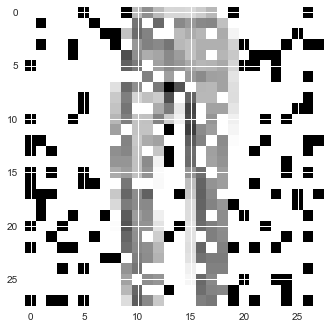

In [362]:
plt.imshow(x_train_raw.values[2].reshape(28,28))

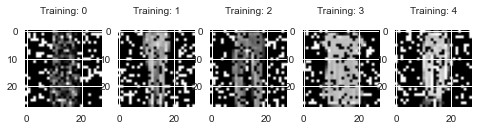

In [3]:
for index,row in x_train_raw.iterrows():
    if index < 5:
        plt.subplot(1, 5, index + 1)
        plt.imshow(row.values.reshape(28,28), cmap=plt.cm.gray)
        plt.title('Training: %i\n' % index, fontsize = 10)
    else:
        break

### Logistic Regression on Raw Training Data

In [4]:
clf = LogisticRegression(random_state=0).fit(x_train_raw, y_train_raw.values.flatten())
train_acc = clf.score(x_train_raw, y_train_raw.values.flatten())
y_predict = clf.predict(x_train_raw)
print('TRAIN ACCURACY: %f'% train_acc)
print('Confusion Matrix')
cm = metrics.confusion_matrix(y_train_raw, y_predict)
cm_df = pd.DataFrame(data=cm, columns=[0, 1], index=[0, 1])
cm_df.columns.name = 'Predicted'
cm_df.index.name = 'True'
print(cm_df)

TRAIN ACCURACY: 0.968000
Confusion Matrix
Predicted     0     1
True                 
0          5847   153
1           231  5769


In [5]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, x_train_raw, y_train_raw, scoring='accuracy', cv=cv, n_jobs=-1)
model.fit(x_train_raw,y_train_raw)
print(scores)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

[0.93416667 0.9425     0.93583333 0.94083333 0.93833333 0.9425
 0.935      0.93666667 0.92583333 0.93666667]
Accuracy: 0.937 (0.005)


In [6]:
# from sklearn.preprocessing import PolynomialFeatures
# poly_degrees = [1,2,3,4,5,6,10,11,12]
# for d in poly_degrees:
#     poly = PolynomialFeatures(degree = d, interaction_only=False, include_bias=False)
#     x_train_poly = poly.fit_transform(x_train_raw)
#     cv = KFold(n_splits=10, random_state=1, shuffle=True)
#     model = LogisticRegression()
#     scores = cross_val_score(model, x_train_poly, y_train_raw, scoring='accuracy', cv=cv, n_jobs=-1)
#     print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

In [7]:
print(x_train_raw.shape)

(12000, 784)


In [162]:
x_trousers = []
for x,y in zip(x_train_raw.values,y_train_raw.values.flatten()):
    if(y==1): #is a trouser
        x_trousers.append(x)

avg_pixel_val_trousers = []
df = pd.DataFrame (x_trousers)
for col in df.columns:
    m = df[col].mean()
    avg_pixel_val_trousers.append(m)

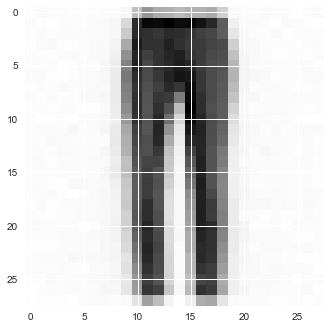

In [163]:
plt.imshow(np.reshape(avg_pixel_val_trousers, (28, 28)))

In [10]:
img_2d = np.reshape(avg_pixel_val_trousers, (28, 28))
coeff_2d = np.reshape(model.coef_.flatten(),(28,28))
for row in range(img_2d.shape[0]):
    for col in range(img_2d.shape[1]):
        if(img_2d[row][col] > 0.5):
            pos = row*28 + col
            # print('(%d,%d) at %d:%f'%(row,col,pos,img_2d[row][col]))

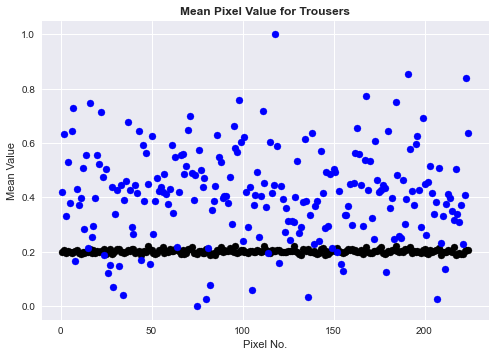

In [11]:
part_1_avg_values = []
part_1_coef_values = []

for row in range(0,img_2d.shape[0]):
    for col in range(0,8):
        part_1_avg_values.append(img_2d[row][col])
        part_1_coef_values.append(coeff_2d[row][col])

from sklearn.preprocessing import MinMaxScaler
fig = plt.figure()
ax = plt.axes()
scaler = MinMaxScaler()
model_cf = part_1_coef_values
scaled_model_cf = scaler.fit_transform(np.reshape(model_cf,(-1,1)))
ax.scatter(list(range(1,225)),part_1_avg_values,color = 'black')
ax.scatter(list(range(1,225)),scaled_model_cf,color='blue')
# ax.plot(bins, avg_pixel_val_trousers, '--', color ='black')
ax.set_title('Mean Pixel Value for Trousers', fontweight ="bold")
ax.set_xlabel('Pixel No.');
ax.set_ylabel('Mean Value');

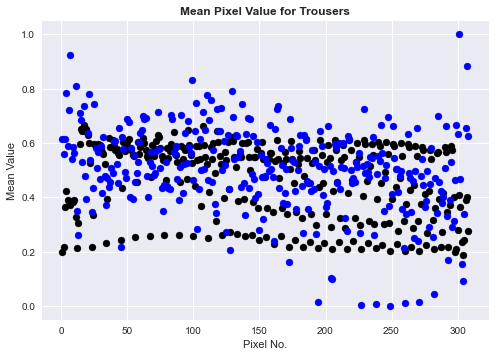

In [12]:
part_2_avg_values = []
part_2_coef_values = []

for row in range(0,img_2d.shape[0]):
    for col in range(8,19):
        part_2_avg_values.append(img_2d[row][col])
        part_2_coef_values.append(coeff_2d[row][col])

from sklearn.preprocessing import MinMaxScaler
fig = plt.figure()
ax = plt.axes()
scaler = MinMaxScaler()
model_cf = part_2_coef_values
scaled_model_cf = scaler.fit_transform(np.reshape(model_cf,(-1,1)))
ax.scatter(list(range(1,309)),part_2_avg_values,color = 'black')
ax.scatter(list(range(1,309)),scaled_model_cf,color='blue')
# ax.plot(bins, avg_pixel_val_trousers, '--', color ='black')
ax.set_title('Mean Pixel Value for Trousers', fontweight ="bold")
ax.set_xlabel('Pixel No.');
ax.set_ylabel('Mean Value');

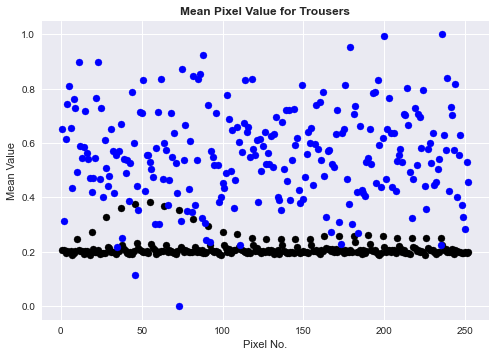

In [13]:
part_3_avg_values = []
part_3_coef_values = []

for row in range(0,img_2d.shape[0]):
    for col in range(19,img_2d.shape[1]):
        part_3_avg_values.append(img_2d[row][col])
        part_3_coef_values.append(coeff_2d[row][col])

from sklearn.preprocessing import MinMaxScaler
fig = plt.figure()
ax = plt.axes()
scaler = MinMaxScaler()
model_cf = part_3_coef_values
scaled_model_cf = scaler.fit_transform(np.reshape(model_cf,(-1,1)))
ax.scatter(list(range(1,253)),part_3_avg_values,color = 'black')
ax.scatter(list(range(1,253)),scaled_model_cf,color='blue')
ax.set_title('Mean Pixel Value for Trousers', fontweight ="bold")
ax.set_xlabel('Pixel No.');
ax.set_ylabel('Mean Value');

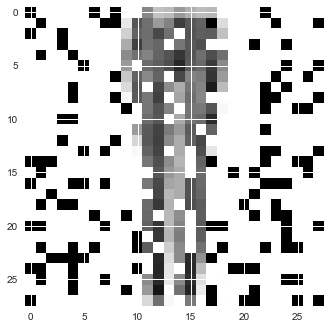

In [14]:
trou1=np.reshape(x_train_raw.iloc[1].values, (28,28))
plt.imshow(trou1)

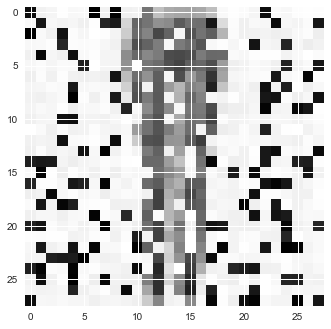

In [15]:
noisy = trou1 + 0.4 * trou1.std() * np.random.random(trou1.shape)
plt.imshow(noisy)

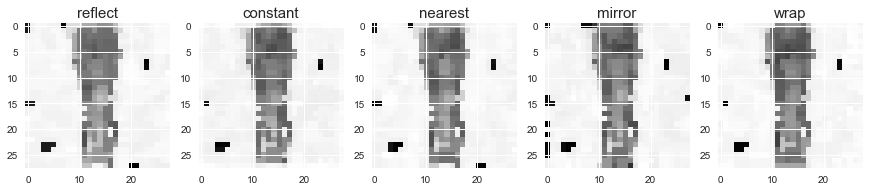

In [16]:
from scipy import ndimage
# gauss_denoised = ndimage.gaussian_filter(noisy, 2)
# plt.imshow(gauss_denoised)
modes = ['reflect', 'constant', 'nearest', 'mirror', 'wrap']
f = plt.figure(figsize=(15,15))
index = 0
for m in modes:
    plt.subplot(1, 5, index + 1)
    noisy = trou1 + 0.4 * trou1.std() * np.random.random(trou1.shape)
    med_denoised = ndimage.median_filter(noisy, 3,mode=m)
    plt.imshow(med_denoised)
    plt.title(m, fontsize = 15)
    index += 1


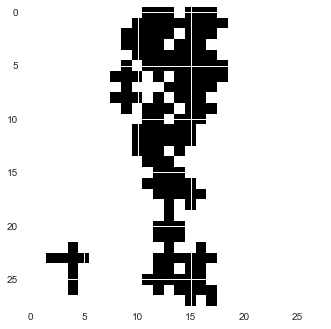

In [17]:
open_square = ndimage.binary_opening(trou1)
eroded_square = ndimage.binary_erosion(trou1)
reconstruction = ndimage.binary_propagation(eroded_square, mask=trou1)
plt.imshow(reconstruction)

In [274]:
from sklearn.metrics import roc_auc_score
def run_training(X,Y,reg_param):
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    model = LogisticRegression(C=reg_param)
    scores = cross_val_score(model, X,Y, scoring='accuracy', cv=cv, n_jobs=-1)
    model.fit(X,Y)
    y_predict = model.predict(X)
    y_predict_proba = model.predict_proba(X)[:, 1]
    roc_score = roc_auc_score(Y, y_predict_proba)
    error_rate = 1-mean(scores)
    # print(scores)
    return model,y_predict, y_predict_proba, error_rate, roc_score

In [275]:
def denoise_data(X,mode):
    X_filter = []
    for row in X:
        trou=np.reshape(row, (28,28))
        # noisy = trou + 0.4 * trou.min() * np.random.random(trou.shape)
        # noisy = trou + 0.4 * trou.mean() * np.random.random(trou.shape)
        noisy = trou + 0.4 * trou.std() * np.random.random(trou.shape)
        med_denoised = ndimage.median_filter(noisy, 3,mode=mode)
        x_flat = med_denoised.flatten()
        alpha = 1000
        sharpened = x_flat + alpha * (x_flat - filter_blurred_f)
        X_filter.append(sharpened)
    return X_filter

In [20]:
def sharpen_edges(X):
    X_filter = []
    for row in X:
        trou=np.reshape(row, (28,28))
        sx = ndimage.sobel(trou, axis=0, mode='constant')
        sy = ndimage.sobel(trou, axis=1, mode='constant')
        sob = np.hypot(sx, sy)
        x_flat = sob.flatten()
        X_filter.append(x_flat)
    return X_filter

In [21]:
def sharpen_img(X):
    X_filter = []
    for row in X:
        trou=np.reshape(row, (28,28))
        blurred_f = ndimage.gaussian_filter(trou, 3)
        filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)
        alpha = 30
        sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)
        x_flat = sharpened.flatten()
        X_filter.append(x_flat)
    return X_filter   

In [70]:
def get_misclassification(x,y_true,y_predict):
    count = 1
    fp_x_list = []
    fn_x_list = []
    for x, prediction, label in zip(x, y_predict, y_true):
        if prediction == 1 and label == 0:
            fp_x_list.append(x)
        elif prediction == 0 and label == 1:
            fn_x_list.append(x)
        else:
            continue
    return fp_x_list,fn_x_list

In [32]:
import os
def run_test(x_test,filename,model):
    path = os.path.join("results", filename)
    yproba1_test = model.predict_proba(x_test)[:, 1]
    np.savetxt(path, yproba1_test)

In [22]:
print("Baseline Model")
run_training(x_train_raw,y_train_raw)

Baseline Model
[0.93416667 0.9425     0.93583333 0.94083333 0.93833333 0.9425
 0.935      0.93666667 0.92583333 0.93666667]
Accuracy: 0.937 (0.005)


In [23]:
# modes = ['reflect', 'constant', 'nearest', 'mirror', 'wrap']
modes = ['constant']
for m in modes:
    x_filtered = denoise_data(x_train_raw.values,m)
    print('Training images have noise removed with median filter and mode %s'%m)
    run_training(x_filtered,y_train_raw)

Training images have noise removed with median filter and mode constant
[0.9575     0.95083333 0.95416667 0.96916667 0.95333333 0.9525
 0.95666667 0.94666667 0.9475     0.95083333]
Accuracy: 0.954 (0.006)


In [25]:
x_filtered = denoise_data(x_train_raw.values,'constant')
run_training(x_filtered,y_train_raw)
clf = LogisticRegression(random_state=0).fit(x_filtered, y_train_raw.values.flatten())
train_acc = clf.score(x_filtered, y_train_raw.values.flatten())
y_predict = clf.predict(x_filtered)
print('TRAIN ACCURACY: %f'% train_acc)
print('Confusion Matrix')
cm = metrics.confusion_matrix(y_train_raw, y_predict)
cm_df = pd.DataFrame(data=cm, columns=[0, 1], index=[0, 1])
cm_df.columns.name = 'Predicted'
cm_df.index.name = 'True'
print(cm_df)

[0.95583333 0.95666667 0.95333333 0.9675     0.9575     0.95333333
 0.9575     0.9525     0.94833333 0.9525    ]
Accuracy: 0.956 (0.005)
TRAIN ACCURACY: 0.974083
Confusion Matrix
Predicted     0     1
True                 
0          5895   105
1           206  5794


In [45]:
clf = LogisticRegression(random_state=0,C=C).fit(x_filtered,  y_train_raw.values.flatten())
train_acc = clf.score(x_filtered, y_train_raw.values.flatten())
print(train_acc)

0.9758333333333333


In [ ]:
C_grid = np.logspace(-9, 6, 31)
x_filtered = denoise_data(x_train_raw.values,'constant')

for C in C_grid:
    run_training(x_filtered,y_train_raw.values.flatten(),reg_param=C)

In [76]:
x_filtered = denoise_data(x_train_raw.values,'constant')
model = run_training(x_filtered,y_train_raw.values.flatten(),reg_param=0.1)
y_predict = clf.predict(x_filtered)
print('Confusion Matrix')
cm = metrics.confusion_matrix(y_train_raw, y_predict)
cm_df = pd.DataFrame(data=cm, columns=[0, 1], index=[0, 1])
cm_df.columns.name = 'Predicted'
cm_df.index.name = 'True'
print(cm_df)
# x_filtered = denoise_data(x_test_raw.values,'constant')
# run_test(x_filtered,'test3.txt',model)
fp,fn = get_misclassification(x_filtered,y_train_raw.values.flatten(),y_predict)

Error Rate at Reg (0.1): 0.036 (0.004)
Confusion Matrix
Predicted     0     1
True                 
0          5871   129
1           193  5807


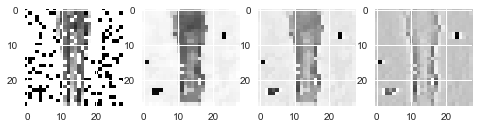

In [154]:
from skimage import exposure,filters
from skimage import restoration
i=2
img_raw = x_train_raw.values[1]
plt.subplot(1,4,1)
plt.imshow(img_raw.reshape(28,28))


trou=np.reshape(img_raw, (28,28))
# trou = ndimage.distance_transform_bf(trou)
# noisy = trou + 0.4 * trou.mean() * np.random.random(trou.shape)
noisy = trou + 0.4 * trou.std() * np.random.random(trou.shape)
med_denoised = ndimage.median_filter(noisy, 3,mode='constant')
x_flat = med_denoised.flatten()
plt.subplot(1,4,2)
plt.imshow(x_flat.reshape(28,28))

filter_blurred_f = ndimage.gaussian_filter(x_flat, 1)
alpha = 1
sharpened = x_flat + alpha * (x_flat - filter_blurred_f)
plt.subplot(1,4,3)
plt.imshow(sharpened.reshape(28,28))

filter_blurred_f = ndimage.gaussian_filter(x_flat, 1)
alpha = 1000
sharpened = x_flat + alpha * (x_flat - filter_blurred_f)
plt.subplot(1,4,4)
plt.imshow(sharpened.reshape(28,28))

# sx = ndimage.sobel(x_flat.reshape(28,28), axis=0, mode='nearest')
# sy = ndimage.sobel(x_flat.reshape(28,28), axis=1, mode='nearest')
# sob = np.hypot(sx, sy)
# plt.subplot(1,3,3)
# plt.imshow(sob.reshape(28,28))

In [158]:
x_filtered = denoise_data(x_train_raw.values,'constant')
model = run_training(x_filtered,y_train_raw.values.flatten(),reg_param=0.1)
y_predict = clf.predict(x_filtered)
print('Confusion Matrix')
cm = metrics.confusion_matrix(y_train_raw, y_predict)
cm_df = pd.DataFrame(data=cm, columns=[0, 1], index=[0, 1])
cm_df.columns.name = 'Predicted'
cm_df.index.name = 'True'
print(cm_df)
# x_filtered = denoise_data(x_test_raw.values,'constant')
# run_test(x_filtered,'test3.txt',model)
fp,fn = get_misclassification(x_filtered,y_train_raw.values.flatten(),y_predict)

Error Rate at Reg (0.1): 0.059 (0.006)
Confusion Matrix
Predicted     0     1
True                 
0          5930    70
1           277  5723


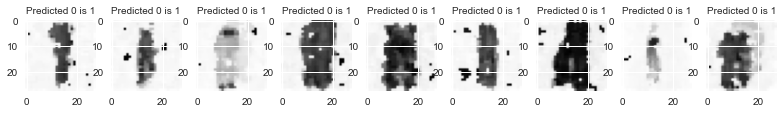

In [74]:
count = 1
f = plt.figure(figsize=(15,15))
for i in fn:
    if count <= 9:
        plt.subplot(1, 10, count + 1)
        plt.imshow(i.reshape(28,28))
        plt.title('Predicted 0 is 1', fontsize = 10)
    else:
        break
    count = count + 1

In [33]:
run_test(x_test_raw,'test1.txt',clf)

In [34]:
x_filtered = denoise_data(x_test_raw.values,'constant')
run_test(x_filtered,'test2.txt',clf)

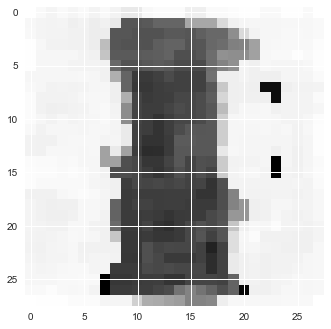

In [41]:
img1 = np.reshape(x_filtered[5],(28,28))
plt.imshow(img1)

In [ ]:
count = 1
fp_x_list = []
fn_x_list = []
for x, prediction, label in zip(x_train_raw.values, y_predict, y_train_raw.values.flatten()):
    if prediction == 1 and label == 0:
        fp_x_list.append(x)
    elif prediction == 0 and label == 1:
        fn_x_list.append(x)
    else:
        continue
count = 1
for i in fn_x_list:
    if count <= 9:
        plt.subplot(1, 10, count + 1)
        plt.imshow(i.reshape(28,28), cmap=plt.cm.gray,vmin=0.0, vmax=1.0,interpolation ='nearest', origin ='lower')
        plt.title('Test: %i\n' % count, fontsize = 10)
    else:
        break
    count = count + 1

In [ ]:
x_filtered = denoise_data(x_train_raw.values,'constant')
x_filtered1 = sharpen_edges(x_filtered)
run_training(x_filtered1,y_train_raw)

In [ ]:
x_filtered = denoise_data(x_train_raw.values,'constant')
x_filtered1 = sharpen_img(x_filtered)
run_training(x_filtered1,y_train_raw)

In [317]:
x_inverted = []
y_inverted = []
for row,label in zip(x_train_raw.values,y_train_raw.values.flatten()):
    trou=np.reshape(row, (28,28))
    img_180 = ndimage.rotate(trou, 180, reshape=False)
    x_flat = img_180.flatten()
    x_inverted.append(x_flat)
    y_inverted.append(label)

In [318]:
# img_1 = np.reshape(x_train_raw.values[1],(28,28))
# # plt.imshow(img_1)
# inv_img_1 = np.reshape(x_inverted[1],(28,28))
# print(y_inverted[1])
# plt.imshow(inv_img_1)

In [319]:
x_train_l = []
y_train_l = []
x_train_l.extend(x_train_raw.values)
x_train_l.extend(x_inverted)
y_train_l.extend(y_train_raw.values.flatten())
y_train_l.extend(y_inverted)
x_train = np.array(x_train_l)
y_train = np.array(y_train_l)

In [3]:
trou = x_train_raw.values[0].reshape(28,28)
trou_inv = x_inverted[0].reshape(28,28)
plt.subplot(121)
plt.imshow(trou)
plt.subplot(122)
plt.imshow(trou_inv)

NameError: name 'x_train_raw' is not defined

In [ ]:
print("Baseline Model")
run_training(x_train,y_train)

In [ ]:
modes = ['constant']
for m in modes:
    x_filtered = denoise_data(x_train,'constant')
    print('Training images have noise removed with median filter and mode %s'%m)
    run_training(x_filtered,y_train)

In [320]:
def denoise_data1(row,mode):
    trou=np.reshape(row, (28,28))
    # noisy = trou + 0.4 * trou.std() * np.random.random(trou.shape)
    med_denoised = ndimage.median_filter(trou, 3,mode=mode)
    filter_blurred_f = ndimage.median_filter(med_denoised, 1,mode=mode)
    alpha = 1000
    sharpened = med_denoised + alpha * (med_denoised - filter_blurred_f)
    # removed = ndimage.grey_opening(sharpened, structure=np.ones((3,3)))
    x_flat = sharpened.flatten()
    return x_flat

In [321]:
def block_mean(row):
    trou=row.reshape(28,28)
    sx, sy = trou.shape
    X, Y = np.ogrid[0:sx, 0:sy]
    regions = sy//6 * (X//4) + Y//6
    blockmean = ndimage.mean(trou, labels=regions,
                              index=np.arange(1, regions.max() +1))
    blockmean.shape = (sx//4, sy//6)
    x_flat = blockmean.flatten()
    return x_flat


In [322]:
x_denoised = []
for x in x_train:
    x_t = denoise_data1(x, 'constant')
    x_b = block_mean(x)
    x_denoised.append(np.concatenate([x_t,x_b]))
    # x_denoised.append(x_t)

In [326]:
len(y_train)

24000

In [329]:
model,y_predict, y_predict_proba, error_rate, roc_score = run_training(x_denoised,y_train,reg_param=1)
print('Reg (%s) Error Rate %.3f AUC Score %.3f' % (1,error_rate, roc_score))

Reg (1) Error Rate 0.073 AUC Score 0.978


In [316]:
model,y_predict, y_predict_proba, error_rate, roc_score = run_training(x_denoised,y_train_raw.values.flatten(),reg_param=0.031)
print('Reg (%s) Error Rate %.3f AUC Score %.3f' % (0.031,error_rate, roc_score))

Reg (0.031) Error Rate 0.036 AUC Score 0.991


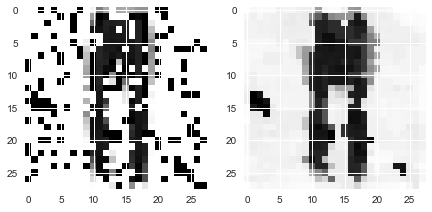

In [247]:
trou1 = x_train_raw.values[25].reshape(28,28)
rem_trou =denoise_data1(trou1,'constant').reshape(28,28)
f = plt.figure(figsize=(15,15))
plt.subplot(141)
plt.imshow(trou1)
plt.subplot(142)
plt.imshow(rem_trou)

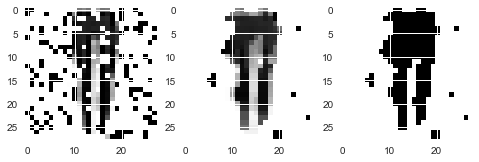

In [356]:
import skimage
gray_image = x_train_raw.values[155].reshape(28,28)

blurred_image = skimage.filters.median(gray_image,mode='constant')

# create a mask based on the threshold
t = 0.4
binary_mask = blurred_image > t

fig, ax = plt.subplots()
plt.subplot(131)
plt.imshow(gray_image)
plt.subplot(132)
plt.imshow(blurred_image)
plt.subplot(133)
plt.imshow(binary_mask)

In [292]:
()

array([0.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.102     , 0.5843    , 0.4392    , 0.        , 0.4431    ,
       0.4314    , 0.4549    , 0.5098    , 0.5098    , 0.        ,
       1.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 0.4784    , 1.        ,
       0.9569    , 0.        , 0.        , 0.        , 1.        ,
       0.9725    , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.6627    , 0.9647    , 0.8863    , 0.898     ,
       0.8863    , 0.8784    , 0.        , 0.8902    , 1.     